<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap04a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解答例

例題4.3

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -1.3]]


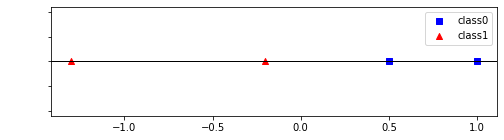

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-1.3]])
y = np.array([0, 0, 1, 1])

plt.figure(figsize=(8,2))
plt.yticks(color="None")
plt.axhline(y=0, linewidth=1, c='black')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='blue', marker='s', label='class0')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.legend(loc='upper right')
roh = 0.5                 # 学習係数
w = np.array([0.2, 0.3])  # 重みの初期値
flag = True               # 学習終了判定用フラグ
(n, d) = X.shape
X2 = np.hstack([np.ones((n, 1)), X])  # 特徴ベクトルをd+1次元に拡張
print(X2)

In [ ]:
while flag:
    flag = False
    for (x, t) in zip(X2, y):
        print(f'w = {w}')
        g = x @ w
        if t == 0 and g < 0:
            w = w + roh * x
            flag = True
        elif t == 1 and g > 0:
            w = w - roh * x
            flag = True
    print('-----') 
print(f'result: {w}')

w = [0.2 0.3]
w = [0.2 0.3]
w = [0.2 0.3]
w = [-0.3  0.4]
-----
w = [-0.3  0.4]
w = [-0.3  0.4]
w = [0.2  0.65]
w = [-0.3   0.75]
-----
w = [-0.3   0.75]
w = [-0.3   0.75]
w = [-0.3   0.75]
w = [-0.3   0.75]
-----
result: [-0.3   0.75]


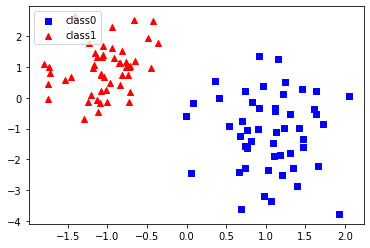

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

# 特徴ベクトルは2次元、冗長な次元なし、クラス毎のクラスタの数1
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=8)
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='upper left')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


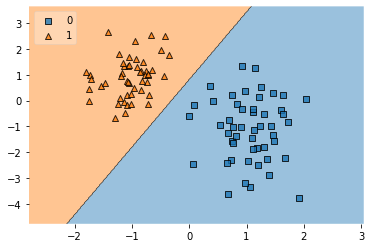

In [ ]:
clf = Perceptron(eta0 = 0.1, random_state=3)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

例題4.5

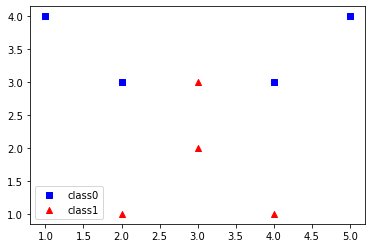

In [ ]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

X = np.array([[1,4], [2,3], [4,3], [5,4], [2,1], [3,2], [3,3], [4,1]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='lower left')
k = 3
x = np.array([3,4])

In [ ]:
mode_val, mode_num = mode(y[np.argsort(np.linalg.norm(X - x, axis=1))][:k])
print(f'result = class{mode_val[0]}')

result = class0


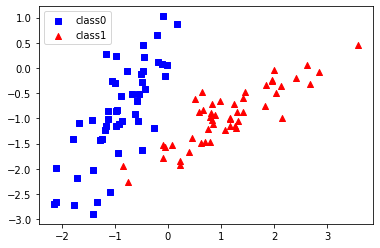

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='upper left')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


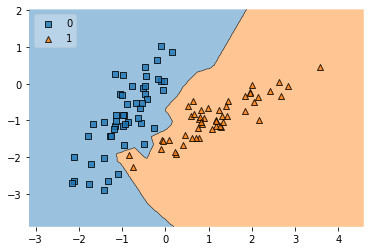

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)